### <font color='darkred'>Análise Estatística Para Data Science com Linguagem Python</font>

### <font color='darkgreen'>Lab 1 - Parte 2 - AST - Estacionaridade </font>
### <font color='darkblue'>Análise Estatística de Séries Temporais</font>

### <font color=darkred> <b>Instalando e Carregando os Pacotes </b> </font>

In [1]:
#Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports para manipulação de dados
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

seaborn    : 0.11.2
pandas     : 1.5.3
statsmodels: 0.13.2
matplotlib : 3.7.1



### <font color=darkred> <b>Carregando o Conjunto de Dados </b> </font>

In [4]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv', header = None)

In [5]:
# Ajustando o nome de cada coluna
dados.columns = ['mes', 'veiculos_produzidos']

In [6]:
# Convertendo a coluna data de object para datetime  
dados['mes'] = pd.to_datetime(dados['mes'], format = '%Y-%m')

In [7]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
dados_serie = dados.set_index('mes')

In [8]:
# Agora temos um conjunto de dados de série temporal. Vamos visualizar o índice:
dados_serie.head()

,veiculos_produzidos
mes,
2012-01-01,113
2012-02-01,119
2012-03-01,134
2012-04-01,129
2012-05-01,121


In [9]:
# Formatando as saídas dos gráficos - Formatação Geral
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

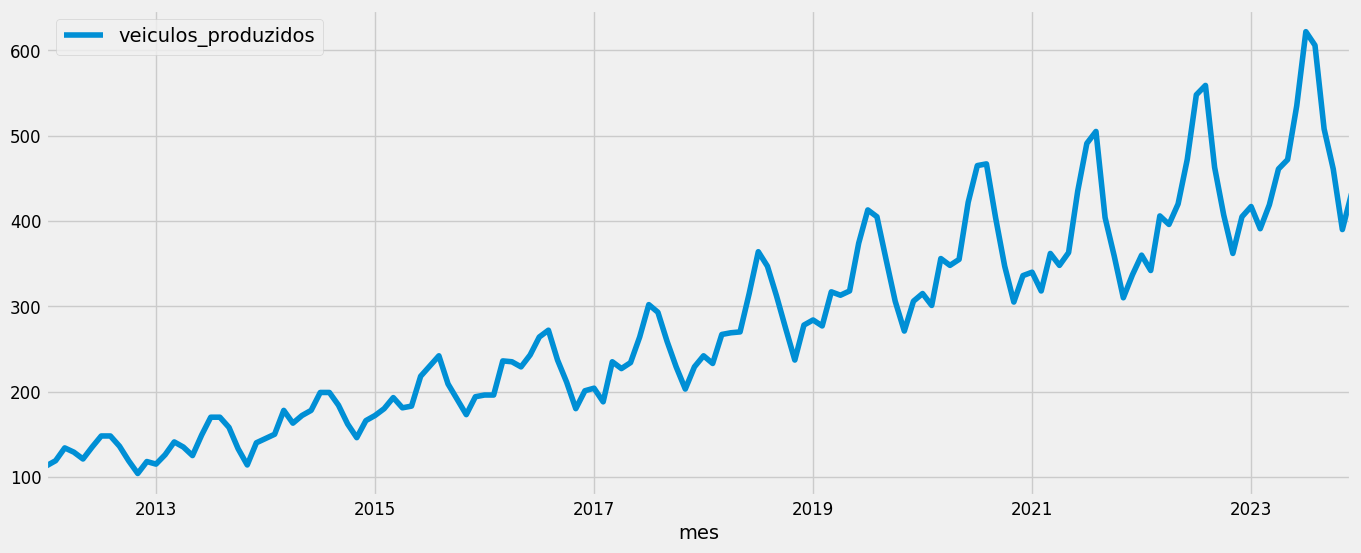

In [10]:
# Plot da série temporal
dados_serie.plot(figsize = (15, 6))
plt.show()

### <font color=darkred> <b> Propriedade Estatística de Séries Temporais </b> </font>

Antes de iniciar qualquer modelagem preditiva em séries temporais é necessário verificar se essas propriedades estatísticas são constantes na série temporal:

- **Estacionariedade**: a série temporal **deve** ser estacionária, ou seja, suas características estatísticas, como **média e variância, não mudam ao longo do tempo.**


- **Não-autocorrelação**: as observações da série temporal não devem ser fortemente correlacionadas **com observações anteriores.**


- **Normalidade**: é frequentemente pressuposto que as observações da série temporal são distribuídas normalmente (seguem uma distribuição normal).

A estacionariedade de uma série temporal é uma propriedade estatística que indica que as características estatísticas da série, como média, variância e autocorrelação, permanecem constantes ao longo do tempo. Em outras palavras, **uma série temporal é estacionária se sua estrutura  e  distribuição  não  mudam  com  o  tempo.**

A  estacionariedade  é  uma  suposição importante  em  muitos  modelos  e  técnicas  de  análise  de  séries  temporais,  pois  facilita  a compreensão, a previsão ea modelagem dos dados.

Existem dois tipos principais de estacionariedade:

- **Estacionariedade  fraca  (ou  estacionariedade  de  covariância):** 
- Uma  série  temporal  é considerada fracamente estacionária se sua **média e variância** permanecerem constantes ao longo do tempo, e sua autocovariância (ou correlação entre os valores da série em diferentes momentos) depender apenas do intervalo entre os pontos, e não do tempo absoluto em que os pontos são observados.

- **Estacionariedade estrita (ou estacionariedade de sentido amplo):**
- Uma série temporal é considerada estritamente estacionária se sua distribuição conjunta de probabilidade permanecer inalterada quando deslocada no tempo. Isso implica que todas as propriedades estatísticas da série, incluindo média, variância, covariância e distribuição, são constantes ao longo do tempo. Na  prática,  a  estacionariedade  estrita  é  uma  condição  muito  restritiva  e  raramente encontrada em dados do mundo real. 

Portanto, a estacionariedade fraca é a forma mais comum de estacionariedade considerada na análise de séries temporais.É importante notar que muitas séries temporais observadas no mundo real, como preços de ações, níveis de emissão de CO2 e temperaturas globais, não são estacionárias. Nesses casos, é comum aplicar técnicas de transformação, **como diferenciação, logaritmos ou suavização**, para tornar a série temporal estacionária antes de realizar análises e modelagem.

### <font color=darkred> <b> Testando a Estacionaridade </b> </font>
### <font color=darkgreen> <b> Plot das Rolling Statistics (Estatísticas Móveis) </b> </font>

As estatísticas móveis, também conhecidas como estatísticas rolantes ou estatísticas deslizantes, são uma técnica usada na análise de séries temporais para calcular estatísticas, como média, mediana, soma, variância e desvio padrão, em uma janela deslizante de tamanho fixo ao longo da série. A ideia é analisar e entender as mudanças nas estatísticas locais ao longo do tempo, o que pode ajudar a identificar tendências, sazonalidade, pontos de mudança e outras características dos dados.

Para calcular estatísticas móveis, você define uma janela de tamanho 'n' (onde n é um número inteiro) e move a janela ao longo da série temporal, calculando a estatística desejada para cada subconjunto de dados dentro da janela. A janela avança uma observação de cada vez e o cálculo é repetido até que a janela alcance o final da série.

Por exemplo, **para calcular a média móvel de uma série temporal, você seleciona uma janela de tamanho n e calcula a média dos valores dentro da janela. Em seguida, a janela é deslocada uma posição à frente e a média é recalculada para os novos valores na janela. Esse processo é repetido até que a janela atinja o final da série temporal.**


#### <font color=darkred> <b> Primeiro, vamos checar se as estatísticas móveis são ou não constantes ao longo da série temporal.</b> </font>

In [11]:
type(dados)

pandas.core.frame.DataFrame

In [12]:
# Determinando estatísticas móveis - media e desvio padrão
# 12 porque nossa série é mensal e vamos usar a janela de 12 meses para considerar todos os meses em cada ano.
# é uma janela deslizante que vai deslizando pelos dados na janela de 12 elementos e vai calculando a media ao longo da STemp
rolmean = dados['veiculos_produzidos'].rolling(window = 12).mean()
rolstd = dados['veiculos_produzidos'].rolling(window = 12).std()

In [13]:
# Prepara os dados para o plot
x = dados['mes'].values
y = dados['veiculos_produzidos'].values

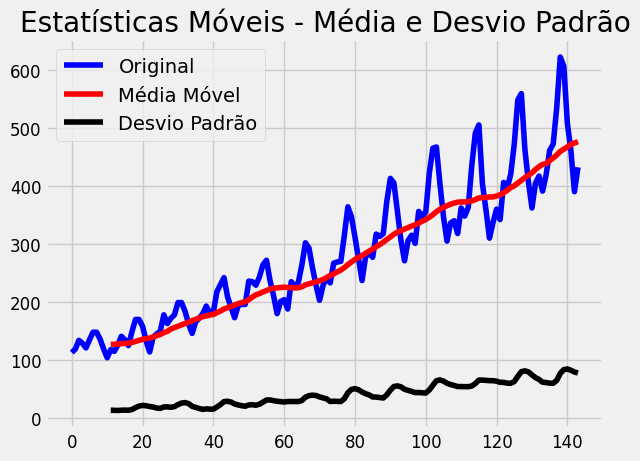

In [14]:
# Plot das estatísticas móveis
orig = plt.plot(y, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
plt.legend(loc = 'best')
plt.title('Estatísticas Móveis - Média e Desvio Padrão')
plt.show()

Análise:
    
- Observamos que a média móvel e o desvio padrão não são constantes em relação ao tempo (tendência crescente).
- A série não é estacionária, oq significa que não podemos usar as tecnicas estatisticas que pressupoe estacionariedade.

### <font color=darkred> <b> Testando a não Autocorrelação </b> </font>
### <font color=darkgreen> <b> Plots da Função de Autocorrrelação (ACF) e Função de Autocorrelação Parcial (PACF) </b> </font>

Vamos criar os gráficos da ACF e PACF.

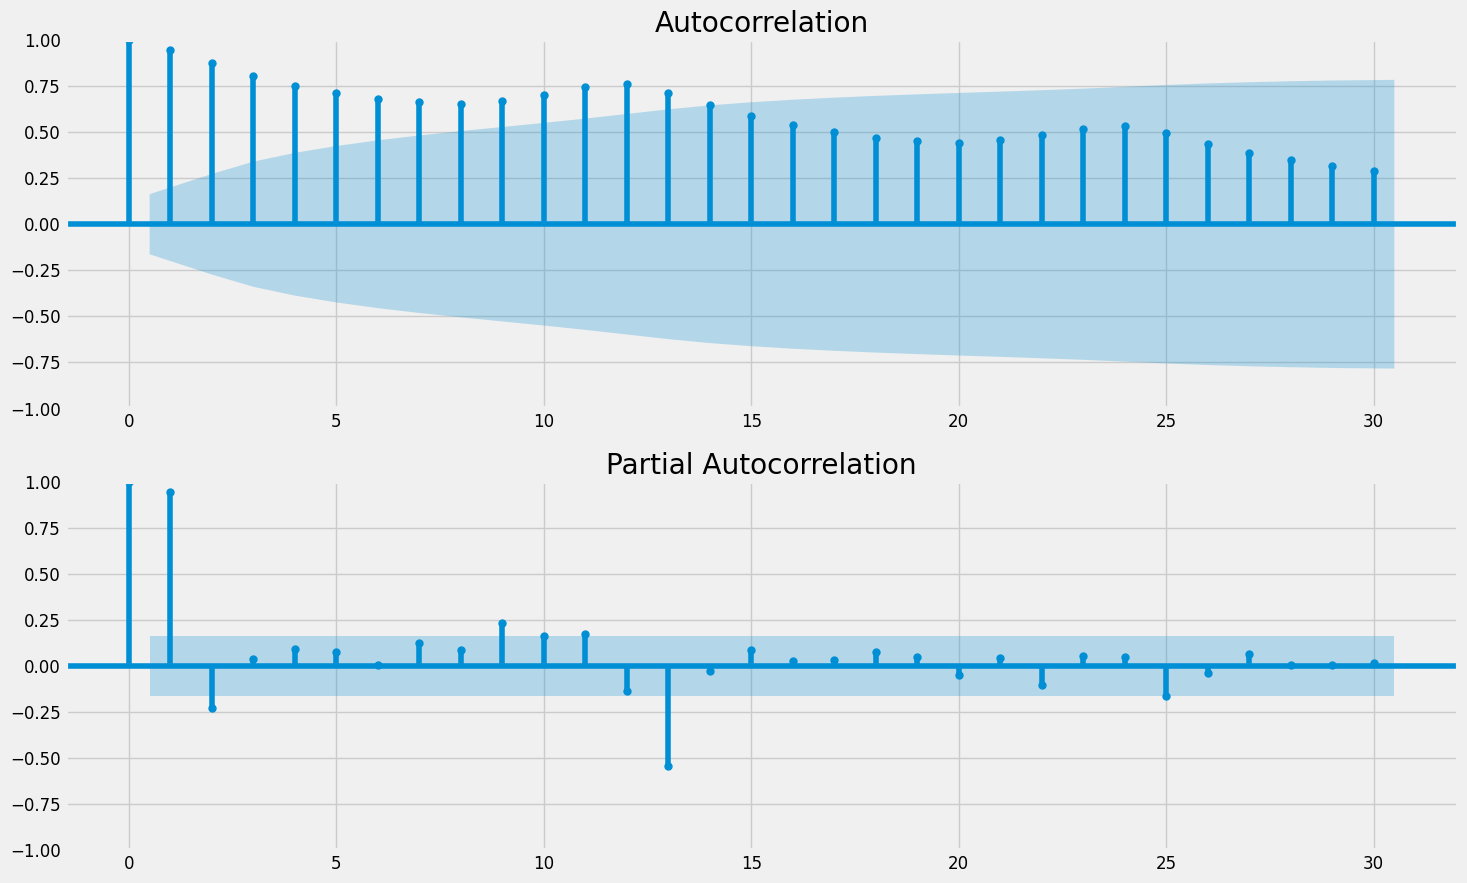

In [15]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(dados_serie.veiculos_produzidos, ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
# Lags - defasagem
# Metodo 'ywm' -
plt.subplot(212)
plot_pacf(dados_serie.veiculos_produzidos, ax = plt.gca(), lags = 30, method = 'ywm')
plt.show()

### <font color=darkgreen> <b> Interpretação dos Gráficos:</b></font>
    
No gráfico, o eixo vertical indica a autocorrelação e o horizontal a defasagem (lag=30, janela de 30 obs (meses no caso). 

**A área sombreada em azul indica onde é significativamente diferente de zero. Como é possível ver na imagem, temos diversos valores ACF (barras verticais) acima do limite da área sombreada em azul, principalmente no incio da série. Nesses casos, a autocorrelação é diferente de zero, indicando que a série não é aleatória – conforme o esperado.**

Algumas **barras verticais estão dentro do limite da área sombreada em azul**. Ou seja, a autocorrelação entre a série com alguns de seus lags é igual a zero, indicando que não há correlação.

<font color=darkgreen> <b> Em termos simples: a área sombreada em azul aponta a significância. Se ultrapassada é porque tem correlação.</b></font>

Cada barra no gráfico ACF representa o nível de correlação entre a série e seus atrasos em ordem cronológica. A área sombreada em azul indica se o nível de correlação entre a série e cada atraso é significativo ou não. 

Testando a hipótese nula de que a correlação do atraso com a série é igual a zero, podemos rejeitá-la sempre que o nível de correlação estiver acima ou abaixo da área sombreada em azul com um nível de significância de 5%. 

Caso contrário, sempre que a correlação estiver dentro da área sombreada em azul,  deixamos de rejeitar a hipótese nula e, portanto, podemos ignorar esses atrasos (ou assumir que não há correlação significativa entre eles e a série). 

O PACF é apenas uma visualização parcial do ACF.

### <font color=darkred> <b> Análise dos Gráficos </b></font>
    
- Se a série temporal for estacionária, os gráficos do ACF / PACF mostrarão uma "queda rápida na correlação" após um pequeno atraso entre os pontos. Não é o caso em nossos gráficos. **A queda lenta (redução do tamanho das barras) indica que essa série não é estacionária.**


- Os dados da nossa série não são estacionários, pois um número alto de observações anteriores está correlacionado com valores futuros.


- **Intervalos de confiança são desenhados na área azul clara.** Por padrão, isso é definido como um intervalo de confiança de 95%, **sugerindo que os valores de correlação fora desta área provavelmente são uma correlação e não um acaso estatístico.**


- Teremos que transformar essa série em estacionária antes de criar um modelo preditivo. Veremos isso mais adiante.

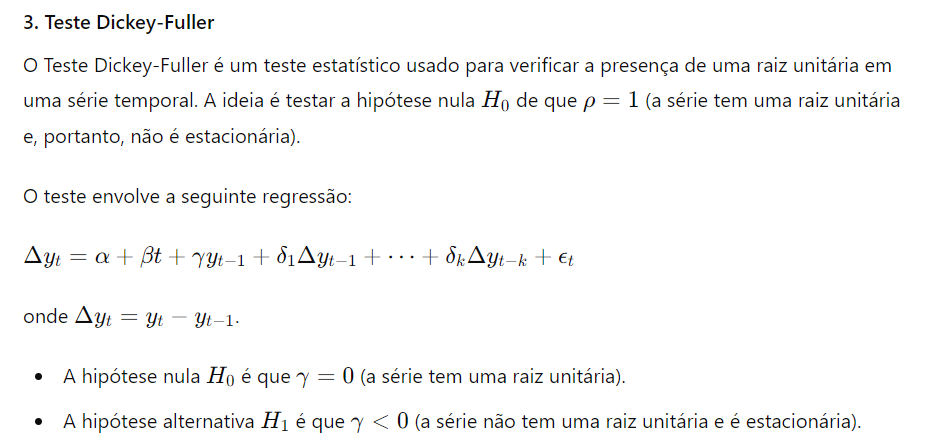
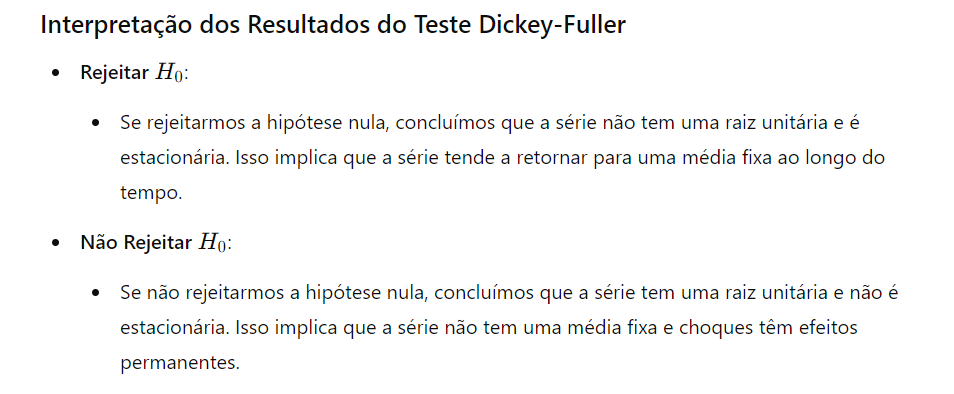
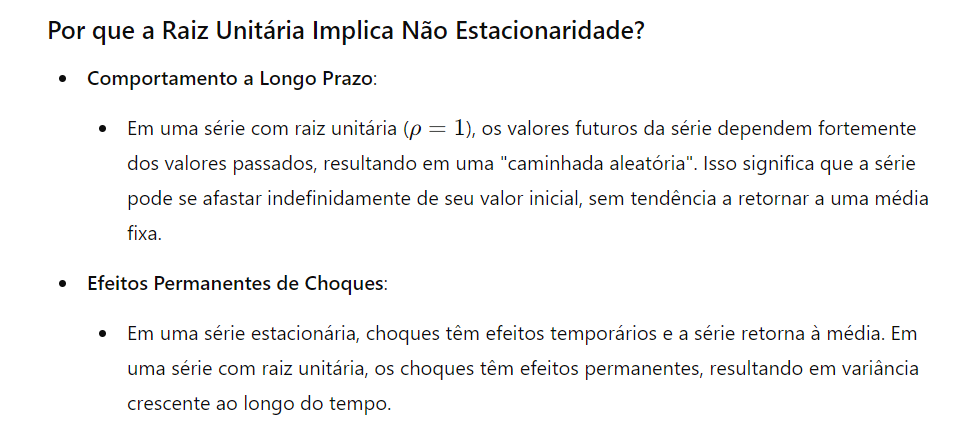

### <font color=darkgreen> <b> Conceito de Lag (defasagem) em ST</b></font>

Lags em séries temporais referem-se ao deslocamento de uma série temporal em relação a si mesma, geralmente em um número específico de períodos de tempo. 

Os lags são usados para estudar a relação entre os valores de uma série temporal em diferentes pontos no tempo, como a autocorrelação, e são fundamentais na construção de modelos autorregressivos (AR) e outros modelos de séries temporais.
 
<font color=darkgreen> <b> Em termos simples, um lag é o valor de uma série temporal observado em um período de tempo anterior.</b></font>

Por exemplo, em uma série temporal diária, um lag de 1 dia (lag 1) é o valor da série  observado  no  dia  anterior,  enquanto  um  lag  de  7  dias  (lag  7)  é  o  valor  observado exatamente uma semana antes.

**Os lags são usados para analisar e modelar a dependência temporal dos dados,** que é a ideia de que os valores de uma série temporal em um ponto no tempo são influenciados ou relacionados aos valores em pontos de tempo anteriores. 

Essa dependência é comum em muitas séries  temporais,  como  preços  de  ações,  vendas  de  varejo  e  temperaturas  diárias,  onde  os valores  tendem  a  seguir  um  certo  padrão  ao  longo  do  tempo  e  são  afetados  por  eventos passados.

- Para calcular e analisar lags em séries temporais, você pode criar variáveis de lag (também chamadas de variáveis deslocadas) que representam os valores da série temporal deslocados por um determinado número de períodos de tempo. Por exemplo, para criar variáveis de lag para uma série temporal, você pode deslocar a série para trás no tempo por 1, 2, 3, ... períodos e criar novas colunas de dados correspondentes aos valores deslocados. 

Em seguida, você pode **analisar a relação entre os valores da série temporal e suas variáveis de lag**, usando **técnicas como gráficos de  autocorrelação  e  autocorrelação  parcial,  e  construir  modelos  de  séries  temporais  que incorporem essa dependência temporal** .Em Python, a biblioteca pandas fornece um **método conveniente chamado shift() para calcular lags em séries temporais e criar variáveis de lag**, como veremos mais adiante neste capítulo.


### <font color=darkgreen> <b> Teste Estatístico Dickey-Fuller Aumentado </b> </font>
<font color=darkgreen> <b> Teste Estatístico para estacionaridade além do que vimos nos gráficos</b> </font>

- A intuição por trás do teste é que, se a série for integrada, o nível de atraso da série y (t-1) não fornecerá informações relevantes na previsão da mudança em y (t).


- **Hipótese nula (H0)**: A série temporal possui raiz unitária, portanto a série não é estacionária.


- **Hipótese alternativa (H1)** - A série temporal possui raiz unitária ié a série é unitária



In [16]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
# Usou para o calculo do autolag a estatistica AIC
# que escolhe automaticamente o número de lags baseado no Critério de Informação de Akaike (AIC).
dfteste = adfuller(dados_serie.veiculos_produzidos, autolag = 'AIC')

# Formatando a saída
# Saida do teste com todas as estatistica e resultados em uma serie em formato de objeto do Pandas  
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.804910
Valor-p                           0.991715
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64


Análise:

- O Valor-p é maior que 0.05. Não temos evidências para rejeitar a hipótese nula de que a série não é estacionária.   Logo, podemos concluir que a série NÃO é estacionária.

### <font color=darkred> Explicando melhor os parâmetros de saída do modelo </font>

**Estatística do Teste:** Esta é a estatística calculada pelo Teste Dickey-Fuller. Ela é comparada com os valores críticos ou p-valor para determinar se a série é estacionária.

**Valor-p:** O valor-p indica a probabilidade de obter a estatística do teste observada (ou mais extrema) se a hipótese nula for verdadeira. 
- Se o valor-p for menor que o nível de significância (geralmente 0.05), rejeitamos a hipótese nula de que a série tem uma raiz unitária (não é estacionária).

**Interpretação Do teste de Hipóteses, pelo valor crítico e pelo P-valor**

1 - Compare a **Estatística do Teste com os Valores Críticos** para os níveis de significância de 1%, 5% e 10%.  
- Se a estatística do teste for **menor que o valor crítico, em um determinado nível de significância, rejeitamos a hipótese nula** (de que a série tem uma raiz unitária.)

- #### <font color=darkblue> A estatística do teste é 0.804910, que é maior (menos negativa) que todos os valores críticos (-3.481682, -2.884042, -2.578770). Portanto, não rejeitamos a hipótese nula H0 com base nessa comparação.</font>

2 - Verifique o **Valor-p**. Se o **valor-p for menor que o nível de significância escolhido (por exemplo, 0.05), você pode rejeitar a hipótese nula e concluir que a série é estacionária.**

O valor-p indica a probabilidade de obter um resultado pelo menos tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira. Se o valor-p for menor que o nível de significância (por exemplo, 0.05), você rejeita a hipótese nula H0.

- #### <font color=darkblue> O valor-p é 0.991715, que é muito maior do que 0.05. Portanto, não rejeitamos a hipótese nula H0 com base no valor-p.</font>

**O AIC  (Akaike  Information  Criterion)**  é  utilizado  como  critério  para  determinar automaticamente o melhor valor de lag para o teste Augmented Dickey-Fuller (ADF). Nesse caso foi 13.

O teste ADF é um teste estatístico usado para verificar a presença de raiz unitária em uma série temporal e, portanto, testar a estacionariedade dos dados.adfuller(dados_serie.veiculos_produzidos, autolag = 'AIC')

A função adfuller() pertence à biblioteca statsmodels em Python e realiza o teste ADF em uma série temporal. O argumento autolag é usado para especificar o método de seleção do lag a ser usado no teste. 

Quando o valor de autolag é definido como 'AIC', o algoritmo seleciona o número de lags que minimiza o critério de informação de Akaike.O critério de informação de Akaike (AIC) é uma métrica usada para comparar e selecionar modelos estatísticos.

O AIC leva em consideração a complexidade do modelo e a qualidade do ajuste  aos  dados.  Ao  minimizar  o  AIC,  buscamos  um  modelo  que  equilibre  a  complexidade (número de parâmetros) e a capacidade de ajustar bem os dados.Neste caso, a função adfuller() escolherá automaticamente o valor de lag que resulta no menor valor de AIC para o teste ADF. 

Isso ajuda a garantir que o teste ADF seja realizado com um valor de lag adequado, levando em consideração a complexidade do modelo e o ajuste aos dados, sem a necessidade de escolher manualmente o valor de lag.

### <font color=darkgreen> <b>  Automatizando  o Teste de Estacionariedade </b> </font>

E aqui um presente para você. Uma função que executa o teste de estacionaridade e pode ser aplicada a qualquer série para testar se ela é ou não estacionária.

**Se a série não for estacionária, teremos que aplicar transformações antes da modelagem. Em nosso exemplo, a série não é estacionária e vamos transformá-la em estacionária mais adiante.**

Isso vale para qualquer série temporal.

In [17]:
# Função
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    
    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(dados_serie.veiculos_produzidos, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

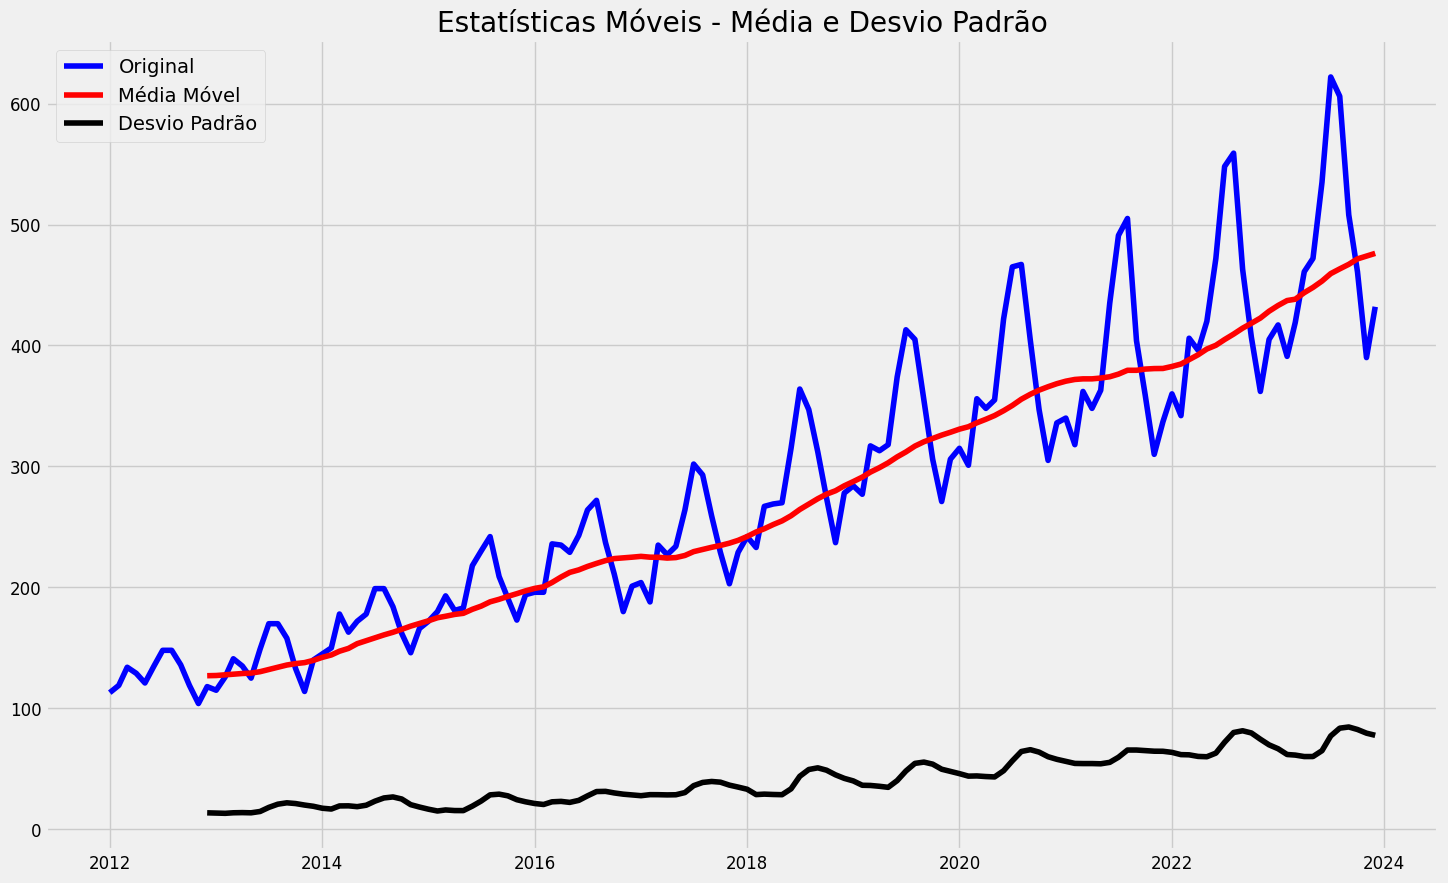


Resultado do Teste Dickey-Fuller:

Estatística do Teste              0.804910
Valor-p                           0.991715
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [18]:
# Executando nossa função
testa_estacionaridade(dados_serie)